In [4]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
users = ("BBC", "CBS", "CNN", "FoxNews", "nytimes")

compound, pos, neu, neg, source, tweetsago = [], [], [], [], [], []

# Loop through Users
for user in users:
    oldest_tweet = None
    counter = 0 # Counter for tweets timeline
    
    # Request 5_times x 20_tweets from each user
    for x in range(5):
        tweets = api.user_timeline("@"+user, max_id = oldest_tweet)
        
        for i in range (len(tweets)):
        
            text = tweets[i]['text'] # extract text from a dictionary
            results = analyzer.polarity_scores(text) # sentiment analysis of extracted text
    
            compound.append(results["compound"])
            pos.append(results["pos"])
            neu.append(results["neu"])
            neg.append(results["neg"])
            source.append(user)
            tweetsago.append(counter)
            counter += 1 # Increment counter inside nested loop. Reset when 'User' is changed.
            
        # update number of oldest tweet: 19th tweet(index starts from 0) minus 1
        oldest_tweet = tweets[len(tweets)-1]['id']-1 
        
sentiment = {"Source": source, "Compound": compound, "Positive": pos, "Neutral": neu, 
             "Negative": neg, "Tweets Ago": tweetsago}     

In [6]:
df = pd.DataFrame(sentiment)
df.head()

,Compound,Negative,Neutral,Positive,Source,Tweets Ago
0,0.0000,0.0,1.000,0.000,BBC,0
1,0.5859,0.0,0.808,0.192,BBC,1
2,0.0000,0.0,1.000,0.000,BBC,2
3,0.0000,0.0,1.000,0.000,BBC,3
4,0.0000,0.0,1.000,0.000,BBC,4


In [7]:
filtered = {}
for user in users:
    filtered[user] = df.loc[(df["Source"] == user), :]

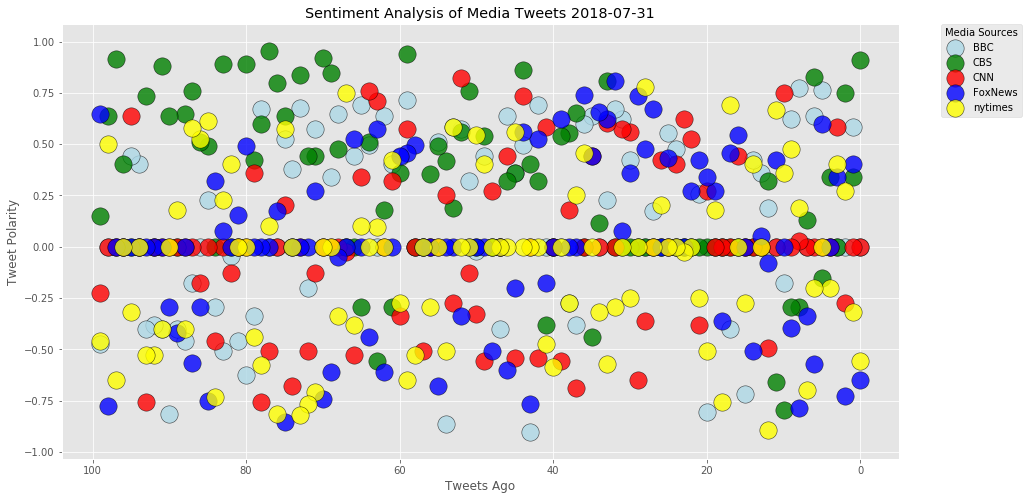

In [13]:
# Build the scatter plots for each city types
colors = ["lightblue", "green", "red", "blue", "yellow"]
plt.figure(figsize=(15,8))
for user in users:

    x_vals = filtered[user]["Tweets Ago"] 
    y_vals = filtered[user]["Compound"]
    
    plt.scatter(x_vals, y_vals, marker="o", s= 300, alpha=0.8, edgecolors="black" ,label = user, 
                facecolors = colors[users.index(user)])

plt.show    
# Incorporate the other graph properties
plt.xlim([x_vals.max()+5,x_vals.min()-5]) 

plt.title(f'Sentiment Analysis of Media Tweets {str(datetime.datetime.today()).split()[0]}') 
plt.xlabel("Tweets Ago") 
plt.ylabel("Tweet Polarity")

# Create a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title = "Media Sources")

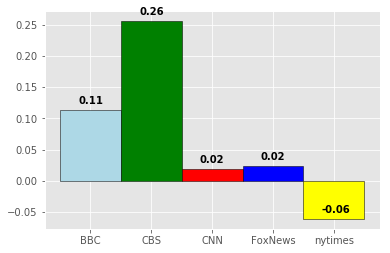

In [9]:
grouped = df.groupby(['Source'])

fig, ax = plt.subplots()
plt.bar(users, grouped['Compound'].mean(), align="center", 
        color = colors, edgecolor = "black", width = 1) 

for x, y in enumerate(grouped['Compound'].mean()): #Create markers on bars
    #print(x,y)
    ax.text(x-0.2 , y+0.01, str(round(y,2)), color='black', fontweight='bold')

